In [1]:
import ctFuncs as ctf
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

# Lendo imagens

In [3]:
#pasta = '/dados/github/projetos/recrutadados/CTs_small/mra26_9.6_D1'                   # CT dinamica
pasta = '/mnt/hdsda3/arquivos/Recrutamento/CT_data_organizado/MRA_29/Recrutado_50mm'    # CT volumetrica

In [4]:
imagens = ctf.lePastaDICOM(pasta)

Size: (512, 512, 89); Spacing: (0.68359375, 0.68359375, 5.0)


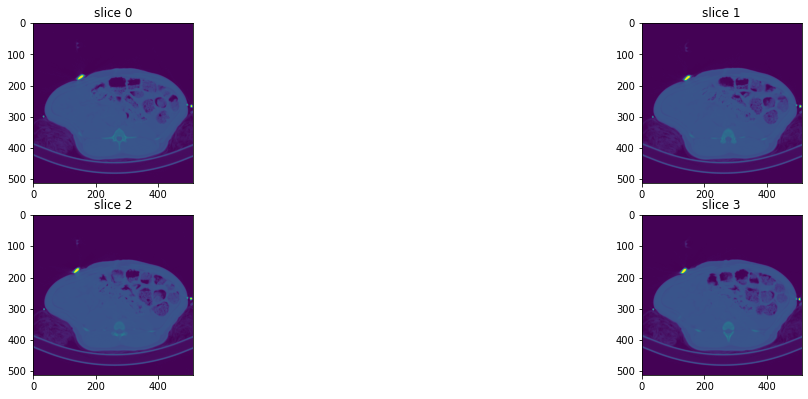

In [5]:
_= ctf.mostraCortesDICOM(imagens,0,4)

# Segmentando pulmão

In [6]:
### Exemplo de código segmentando pulmão aerado:
# df = ctf.SegmentaPulmaoAerado(imagens)              # segmenta pulmao aerado
# _= ctf.mostraCortes(df.imagem.values,0,4)           # mostra imagens de ct completas
# _= ctf.mostraCortes(df.mascara_aerado.values,0,4)   # mostra mascaras do pulmao aerado
# plt.imshow(df.imagem.values[0])                     # mostra apenas um corte

In [7]:
df = ctf.SegmentaPulmaoCompleto(imagens, threshold=50)  # threshold para pulmão totalmente recrutado

Tamanho: 512 512 89


In [8]:
df.head(3)

,imagem,mascara_ar,imagem_ar
0,"[[-1003, -991, -1000, -1006, -992, -999, -1015...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,"[[-1015, -1000, -998, -1003, -1002, -995, -999...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,"[[-987, -994, -1009, -1012, -1004, -1006, -100...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [9]:
## PARA INVESTIGAR...
#import SimpleITK as sitk
#img_aux = imagens[:,:,1]
#img_aux = sitk.GetImageFromArray(sitk.GetArrayFromImage(img_aux)) # sem isso não funciona!!!
#mask_pulmao_completo = ctf.SegmentaPulmaoCompletoImg(img_aux, threshold=50) # threshold para pulmão totalmente recrutado
#plt.imshow(ctf.I2A(mask_pulmao_completo))

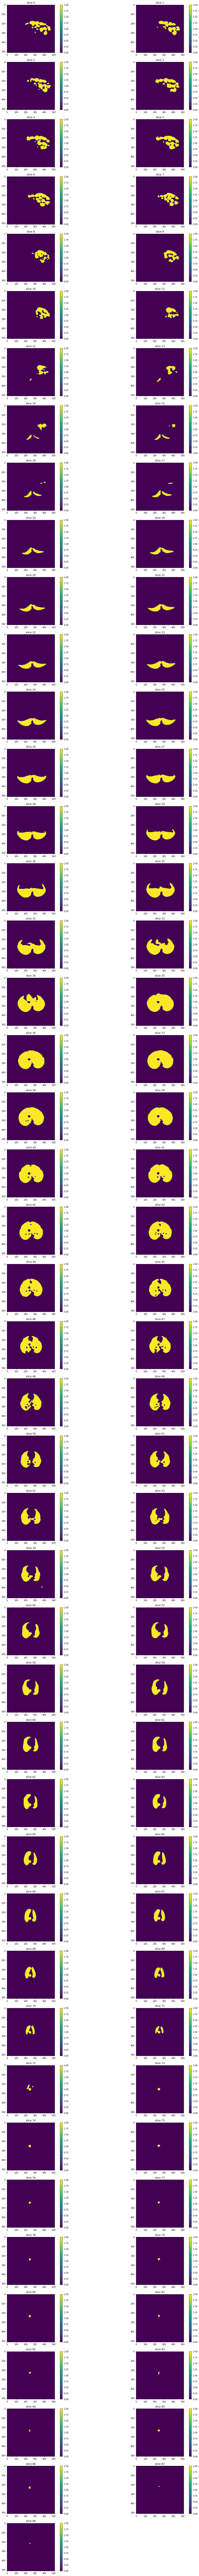

In [10]:
fig = ctf.mostraCortes(df.mascara_ar.values,0,len(df),colorbar=True)

## Separando intestino

In [11]:
pulmao_completo = ctf.SeparaTecidoConectado(df.mascara_ar.values,2)


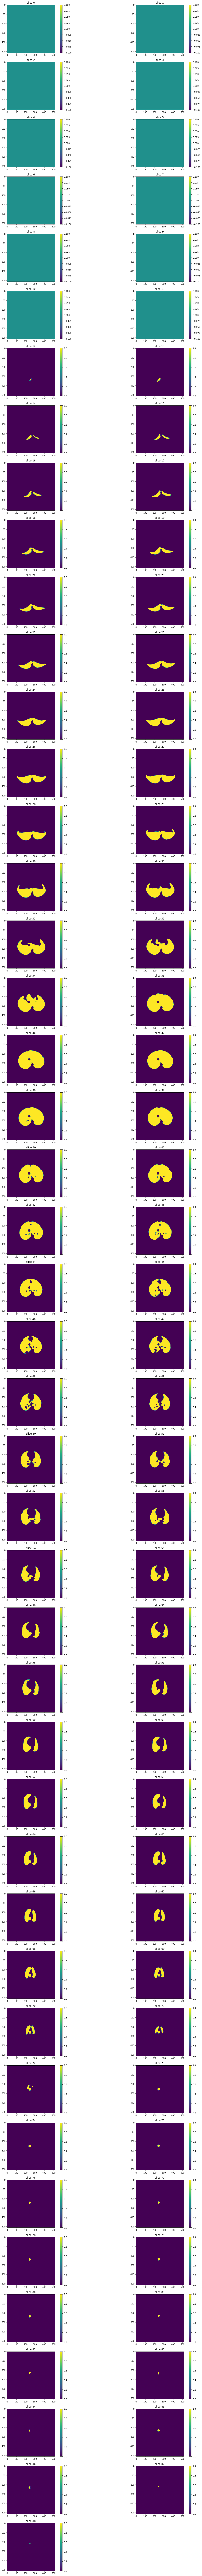

In [12]:
fig = ctf.mostraCortes(ctf.I2A(pulmao_completo),0,pulmao_completo.GetSize()[2],colorbar=True)

## Separando traqueia

In [13]:
mascara_tecido_Image = ctf.SegmentaTraqueia(imagens, pulmao_completo, altura=0.8)

(71, 89)


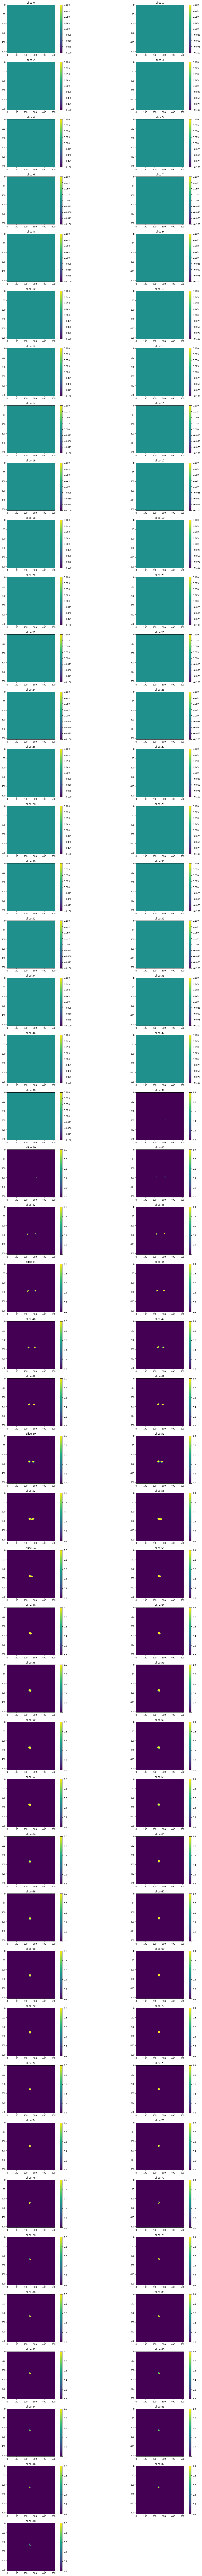

In [14]:
fig = ctf.mostraCortes(ctf.I2A(mascara_tecido_Image),0,pulmao_completo.GetSize()[2],colorbar=True)

In [15]:
temp2 = ctf.I2A(imagens)
print(f'Cuidado! Índices invertidos: {temp2[88][214,245]} = {imagens[245,214,88]}')

Cuidado! Índices invertidos: -957 = -957


# ToDo: Incluir segmentação do intestino/traqueia no ctFuncs.py e gravacao de Nifti